In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

#### The idea is to build a movie recommendation system based on the input movie given by the user. The model should to understand the genre of the input movie and recommend similar movies to the user. 

In [5]:
df = pd.read_csv("tmdb_5000_movies.csv")
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [9]:
df.info()
# Given the following columns we can see that the genre and keywords are important for predicting similar
# movie recommendation which may interest the users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [18]:
# Converting from json to readable format
j = json.loads(df.loc[0,'genres'])
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [46]:
temp =''
for x in j:
    y = ''.join(x['name'].split())
    temp = temp +" "+ y
temp = temp.strip()
temp

'Action Adventure Fantasy ScienceFiction'

In [61]:
def convert_input_to_string(row):
    j = json.loads(row)
    temp =''
    for x in j:
        y = ''.join(x['name'].split())
        temp = temp +" "+ y
    temp = temp.strip()
    return temp
    
df['genre_str'] = df['genres'].apply(convert_input_to_string)
df['keywords_str'] = df['keywords'].apply(convert_input_to_string)

In [67]:
df['genre_and_keywords_str'] = df['genre_str'] +" "+ df['keywords_str']

In [69]:
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df['genre_and_keywords_str'])
X

<4803x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 38972 stored elements in Compressed Sparse Row format>

In [124]:
# Creating an movie to index mapping
Y = pd.Series(df.index, index=df['title'])

In [119]:
idx = Y['Iron Man']
query = X[idx]
query

<1x2500 sparse matrix of type '<class 'numpy.float64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [120]:
scores = cosine_similarity(query, X)
scores=scores.flatten()

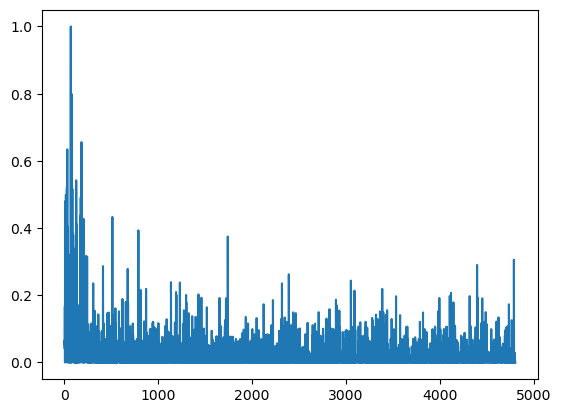

In [121]:
plt.plot(scores)
# we can see a max score of 1 as the input movie (in this case Iron Man) is also in the database and thus it matches 100%

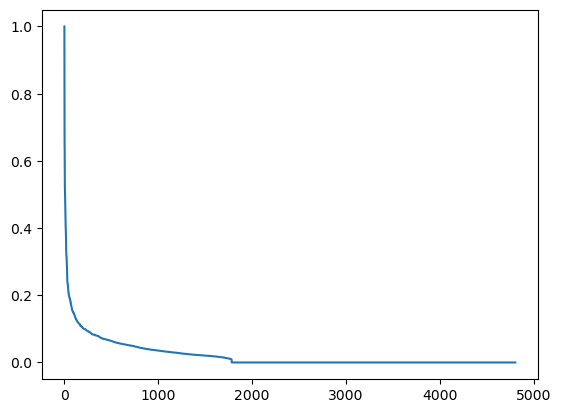

In [122]:
# Sort "scores" 
sorted_list = np.argsort(-scores)
plt.plot(scores[sorted_list])

In [123]:
recommendation_idx = sorted_list[1:6]

print("Top 5 movie recommendations :\n")
df['title'].iloc[recommendation_idx]

Top 5 movie recommendations :



79                     Iron Man 2
182                       Ant-Man
31                     Iron Man 3
126          Thor: The Dark World
26     Captain America: Civil War
Name: title, dtype: object

## Creating a single funtion that would take movie name as input and provide top 5 movie recommendations:

In [140]:
# based on cosine similarity
def movie_recommender(name):
    try:
        df = pd.read_csv("tmdb_5000_movies.csv")

        df['genre_str'] = df['genres'].apply(convert_input_to_string)
        df['keywords_str'] = df['keywords'].apply(convert_input_to_string)
        df['genre_and_keywords_str'] = df['genre_str'] +" "+ df['keywords_str']

        tfidf = TfidfVectorizer(max_features=2500)
        X = tfidf.fit_transform(df['genre_and_keywords_str'])

        # Creating an movie to index mapping
        Y = pd.Series(df.index, index=df['title'])

        idx = Y[name]
        query = X[idx]
        scores = cosine_similarity(query, X)
        scores=scores.flatten()
        sorted_list = np.argsort(-scores)
        recommendation_idx = sorted_list[1:6]

        print("Top 5 movie recommendations :\n")
        return df['title'].iloc[recommendation_idx]
    except:
        print("Movie Not Found!!")

In [144]:
movie_recommender('Iron Man')

Top 5 movie recommendations :



79                     Iron Man 2
182                       Ant-Man
31                     Iron Man 3
126          Thor: The Dark World
26     Captain America: Civil War
Name: title, dtype: object

In [145]:
movie_recommender('The Conjuring')

Top 5 movie recommendations :



3220    The Haunting in Connecticut 2: Ghosts of Georgia
2533                                  The Woman in Black
4328                               The Vatican Exorcisms
1054                                       Scary Movie 2
2302                                     Won't Back Down
Name: title, dtype: object

In [146]:
movie_recommender('Runaway Bride')

Top 5 movie recommendations :



4115                    House of D
2325    My Big Fat Greek Wedding 2
4604         It Happened One Night
2689            Our Family Wedding
2554              The Wedding Date
Name: title, dtype: object